In [12]:
!pip install matplotlib
!pip install seaborn




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.1 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [14]:
df = pd.read_csv('eathquakes.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-11-15T10:41:05.732Z,-61.5218,153.9433,10.000,5.5,mww,28.0,113.0,7.524,0.31,...,2024-11-16T10:44:36.940Z,Balleny Islands region,earthquake,9.88,1.702,0.068,21.0,reviewed,us,us
1,2024-11-15T05:28:29.617Z,-4.7021,153.3201,51.891,6.6,mww,50.0,67.0,1.260,1.35,...,2024-11-16T08:12:03.649Z,"123 km ESE of Kokopo, Papua New Guinea",earthquake,8.85,7.797,0.061,26.0,reviewed,us,us
2,2024-11-11T10:16:58.633Z,20.2122,145.7557,41.918,5.6,mww,87.0,79.0,4.951,1.21,...,2024-11-12T10:19:15.587Z,"Maug Islands region, Northern Mariana Islands",earthquake,9.21,6.712,0.060,27.0,reviewed,us,us
3,2024-11-10T16:49:50.382Z,19.8116,-77.0391,14.000,6.8,mww,87.0,25.0,0.610,0.89,...,2024-11-14T17:59:12.810Z,"40 km SSW of Bartolomé Masó, Cuba",earthquake,2.61,1.655,0.032,94.0,reviewed,us,us
4,2024-11-10T15:50:02.566Z,19.8523,-76.8901,14.219,5.9,mww,64.0,58.0,0.464,0.82,...,2024-11-13T10:33:18.215Z,"35 km S of Bartolomé Masó, Cuba",earthquake,3.94,5.292,0.048,41.0,reviewed,us,us


In [15]:
df['type'].value_counts()



type
earthquake           19506
nuclear explosion       75
volcanic eruption        1
explosion                1
Name: count, dtype: int64

In [16]:
df = df[df['type'] == 'earthquake']


In [17]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-11-15T10:41:05.732Z,-61.5218,153.9433,10.000,5.5,mww,28.0,113.0,7.524,0.31,...,2024-11-16T10:44:36.940Z,Balleny Islands region,earthquake,9.88,1.702,0.068,21.0,reviewed,us,us
1,2024-11-15T05:28:29.617Z,-4.7021,153.3201,51.891,6.6,mww,50.0,67.0,1.260,1.35,...,2024-11-16T08:12:03.649Z,"123 km ESE of Kokopo, Papua New Guinea",earthquake,8.85,7.797,0.061,26.0,reviewed,us,us
2,2024-11-11T10:16:58.633Z,20.2122,145.7557,41.918,5.6,mww,87.0,79.0,4.951,1.21,...,2024-11-12T10:19:15.587Z,"Maug Islands region, Northern Mariana Islands",earthquake,9.21,6.712,0.060,27.0,reviewed,us,us
3,2024-11-10T16:49:50.382Z,19.8116,-77.0391,14.000,6.8,mww,87.0,25.0,0.610,0.89,...,2024-11-14T17:59:12.810Z,"40 km SSW of Bartolomé Masó, Cuba",earthquake,2.61,1.655,0.032,94.0,reviewed,us,us
4,2024-11-10T15:50:02.566Z,19.8523,-76.8901,14.219,5.9,mww,64.0,58.0,0.464,0.82,...,2024-11-13T10:33:18.215Z,"35 km S of Bartolomé Masó, Cuba",earthquake,3.94,5.292,0.048,41.0,reviewed,us,us


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19506 entries, 0 to 19582
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             19506 non-null  object 
 1   latitude         19506 non-null  float64
 2   longitude        19506 non-null  float64
 3   depth            19506 non-null  float64
 4   mag              19506 non-null  float64
 5   magType          19506 non-null  object 
 6   nst              8136 non-null   float64
 7   gap              10748 non-null  float64
 8   dmin             5095 non-null   float64
 9   rms              19301 non-null  float64
 10  net              19506 non-null  object 
 11  id               19506 non-null  object 
 12  updated          19506 non-null  object 
 13  place            19506 non-null  object 
 14  type             19506 non-null  object 
 15  horizontalError  4634 non-null   float64
 16  depthError       7509 non-null   float64
 17  magError         

In [19]:
df['magType'].value_counts()


magType
mwc    5591
mww    5267
mw     4613
mwb    2465
mb     1236
ms      244
ml       43
mwr      32
md        8
mwp       3
mh        3
Ml        1
Name: count, dtype: int64

In [20]:
df = df[df['magType'].isin(['mwc', 'mww', 'mw'])]

df.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-11-15T10:41:05.732Z,-61.5218,153.9433,10.000,5.5,mww,28.0,113.0,7.524,0.31,...,2024-11-16T10:44:36.940Z,Balleny Islands region,earthquake,9.88,1.702,0.068,21.0,reviewed,us,us
1,2024-11-15T05:28:29.617Z,-4.7021,153.3201,51.891,6.6,mww,50.0,67.0,1.260,1.35,...,2024-11-16T08:12:03.649Z,"123 km ESE of Kokopo, Papua New Guinea",earthquake,8.85,7.797,0.061,26.0,reviewed,us,us
2,2024-11-11T10:16:58.633Z,20.2122,145.7557,41.918,5.6,mww,87.0,79.0,4.951,1.21,...,2024-11-12T10:19:15.587Z,"Maug Islands region, Northern Mariana Islands",earthquake,9.21,6.712,0.060,27.0,reviewed,us,us
3,2024-11-10T16:49:50.382Z,19.8116,-77.0391,14.000,6.8,mww,87.0,25.0,0.610,0.89,...,2024-11-14T17:59:12.810Z,"40 km SSW of Bartolomé Masó, Cuba",earthquake,2.61,1.655,0.032,94.0,reviewed,us,us
4,2024-11-10T15:50:02.566Z,19.8523,-76.8901,14.219,5.9,mww,64.0,58.0,0.464,0.82,...,2024-11-13T10:33:18.215Z,"35 km S of Bartolomé Masó, Cuba",earthquake,3.94,5.292,0.048,41.0,reviewed,us,us


In [21]:
df = df[['time', 'latitude', 'longitude', 'depth', 'mag', 'magType']]
df.head()



,time,latitude,longitude,depth,mag,magType
0,2024-11-15T10:41:05.732Z,-61.5218,153.9433,10.000,5.5,mww
1,2024-11-15T05:28:29.617Z,-4.7021,153.3201,51.891,6.6,mww
2,2024-11-11T10:16:58.633Z,20.2122,145.7557,41.918,5.6,mww
3,2024-11-10T16:49:50.382Z,19.8116,-77.0391,14.000,6.8,mww
4,2024-11-10T15:50:02.566Z,19.8523,-76.8901,14.219,5.9,mww


In [22]:
df.isnull().sum()


time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
dtype: int64

In [23]:
df.shape

(15471, 6)

In [24]:
df['time'] = pd.to_datetime(df['time'])

In [25]:

df['date'] = df['time'].dt.date
df['time_only'] = df['time'].dt.time
df = df[['time_only','date', 'latitude', 'longitude', 'depth', 'mag', 'magType']]
df.head()




,time_only,date,latitude,longitude,depth,mag,magType
0,10:41:05.732000,2024-11-15,-61.5218,153.9433,10.000,5.5,mww
1,05:28:29.617000,2024-11-15,-4.7021,153.3201,51.891,6.6,mww
2,10:16:58.633000,2024-11-11,20.2122,145.7557,41.918,5.6,mww
3,16:49:50.382000,2024-11-10,19.8116,-77.0391,14.000,6.8,mww
4,15:50:02.566000,2024-11-10,19.8523,-76.8901,14.219,5.9,mww


In [26]:
date_column = df['date']

# Expected date format
date_format = '%m/%d/%Y'

# List of inconsistent values
inconsistent_values = []

# Check all values in column
for index, date in date_column.items():
    try:
        # Parse date string using expected format
        pd.to_datetime(date, format=date_format)
    except ValueError:
        # If parsing fails, add value to list
        inconsistent_values.append((index, date))

print(inconsistent_values)


[]


In [27]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date'].dtype

dtype('<M8[ns]')

In [28]:
df['year'] = df['date'].dt.year
df.head()

,time_only,date,latitude,longitude,depth,mag,magType,year
0,10:41:05.732000,2024-11-15,-61.5218,153.9433,10.000,5.5,mww,2024
1,05:28:29.617000,2024-11-15,-4.7021,153.3201,51.891,6.6,mww,2024
2,10:16:58.633000,2024-11-11,20.2122,145.7557,41.918,5.6,mww,2024
3,16:49:50.382000,2024-11-10,19.8116,-77.0391,14.000,6.8,mww,2024
4,15:50:02.566000,2024-11-10,19.8523,-76.8901,14.219,5.9,mww,2024


In [29]:
df['time_only'] = df['time_only'].astype(str).str.slice(0, 8)

In [30]:
df.head()

,time_only,date,latitude,longitude,depth,mag,magType,year
0,10:41:05,2024-11-15,-61.5218,153.9433,10.000,5.5,mww,2024
1,05:28:29,2024-11-15,-4.7021,153.3201,51.891,6.6,mww,2024
2,10:16:58,2024-11-11,20.2122,145.7557,41.918,5.6,mww,2024
3,16:49:50,2024-11-10,19.8116,-77.0391,14.000,6.8,mww,2024
4,15:50:02,2024-11-10,19.8523,-76.8901,14.219,5.9,mww,2024


In [31]:
df.describe()

,date,latitude,longitude,depth,mag,year
count,15471,15471.000000,15471.000000,15471.000000,15471.000000,15471.000000
mean,2004-12-21 19:33:53.507853440,-1.141070,31.563714,71.278851,5.887065,2004.473208
min,1985-01-02 00:00:00,-72.448000,-179.997000,-3.000000,5.500000,1985.000000
25%,1994-07-24 12:00:00,-20.703650,-85.272750,10.000000,5.600000,1994.000000
50%,2005-01-06 00:00:00,-4.855000,95.718000,30.000000,5.700000,2005.000000
75%,2015-08-10 00:00:00,18.898700,143.535500,50.000000,6.000000,2015.000000
max,2024-11-15 00:00:00,86.922900,179.998100,687.600000,9.100000,2024.000000
std,NaN,29.957936,127.237074,129.920510,0.436012,11.835887


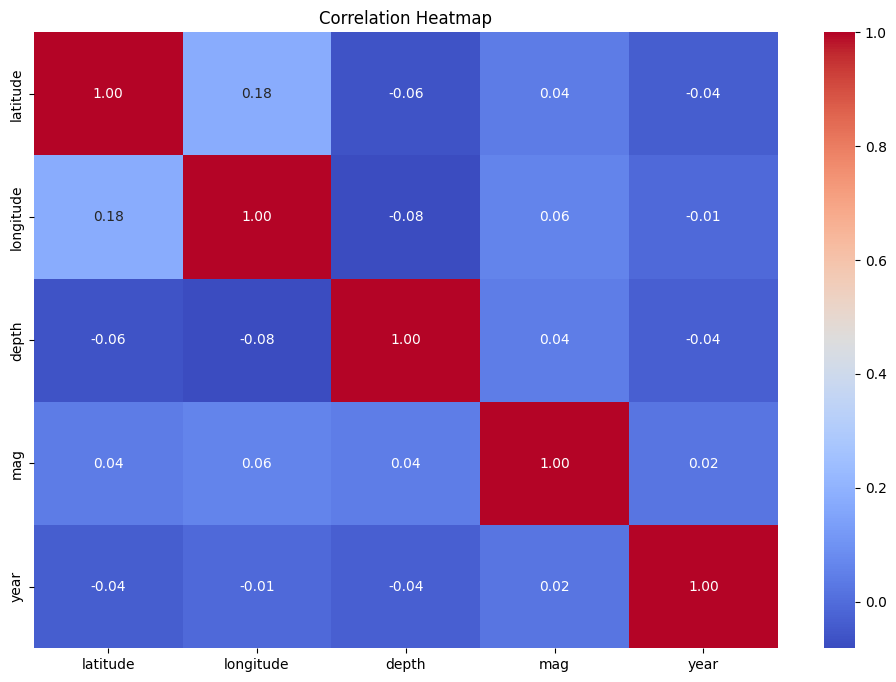

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

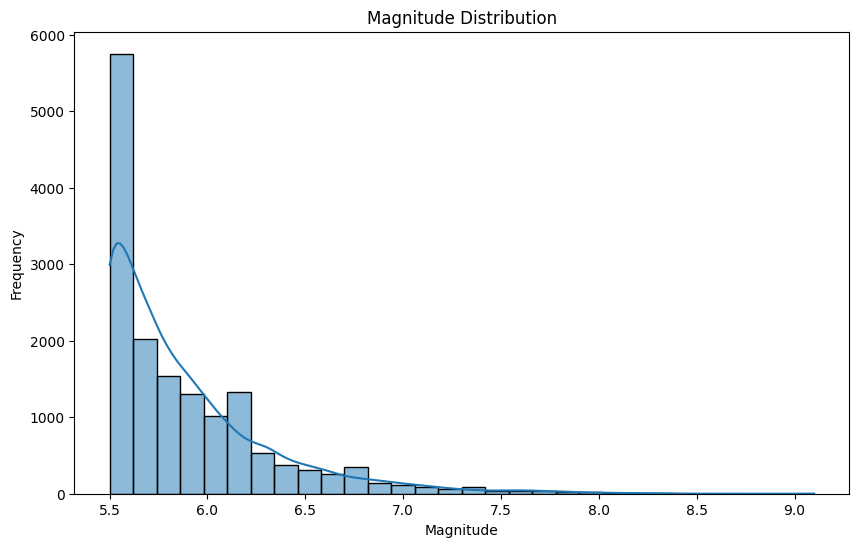

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], bins=30, kde=True)
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

In [34]:
day_of_month_earthquakes = df['date'].dt.day
print(day_of_month_earthquakes.head())

0    15
1    15
2    11
3    10
4    10
Name: date, dtype: int32


<Axes: xlabel='date', ylabel='Count'>

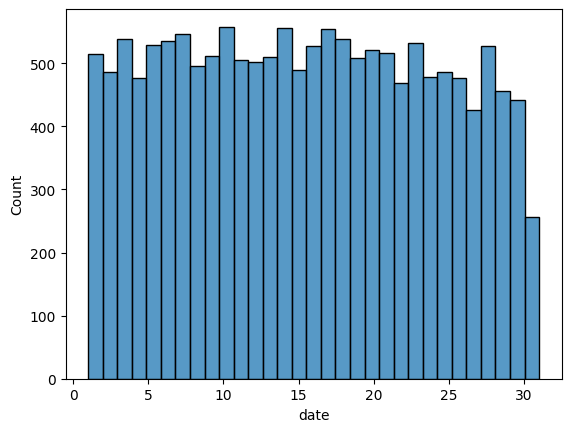

In [35]:
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

sns.histplot(day_of_month_earthquakes, kde = False, bins = 31)

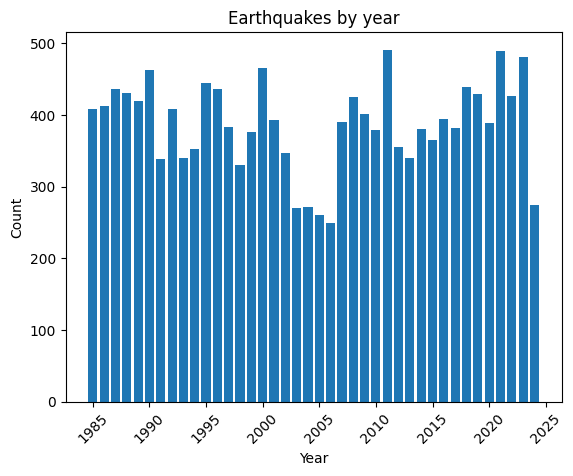

In [36]:
grouped_data = df.groupby('year').size().reset_index(name='Count')

plt.bar(grouped_data['year'], grouped_data['Count'])
plt.title('Earthquakes by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

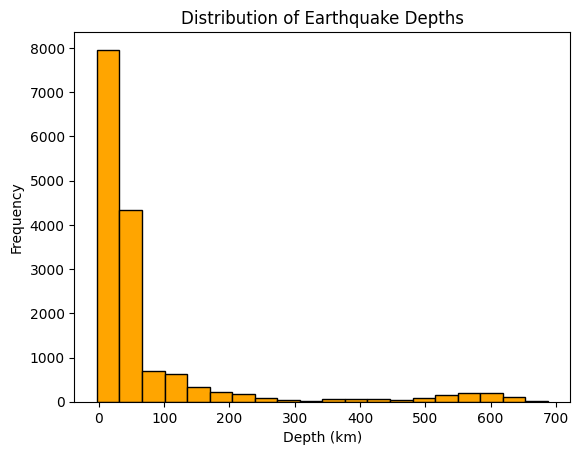

In [37]:
plt.hist(df['depth'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

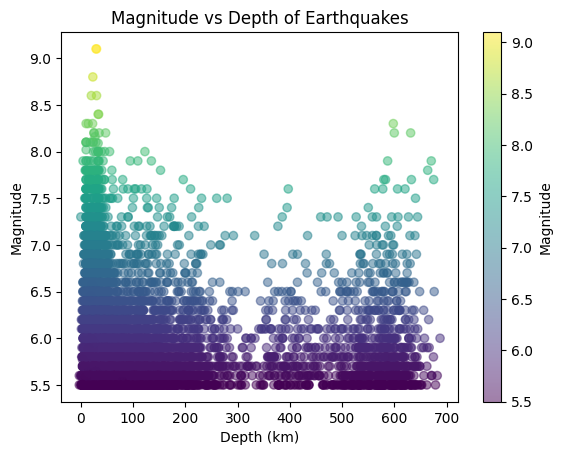

In [38]:
plt.scatter(df['depth'], df['mag'], alpha=0.5, c=df['mag'], cmap='viridis')
plt.title('Magnitude vs Depth of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.colorbar(label='Magnitude')
plt.show()

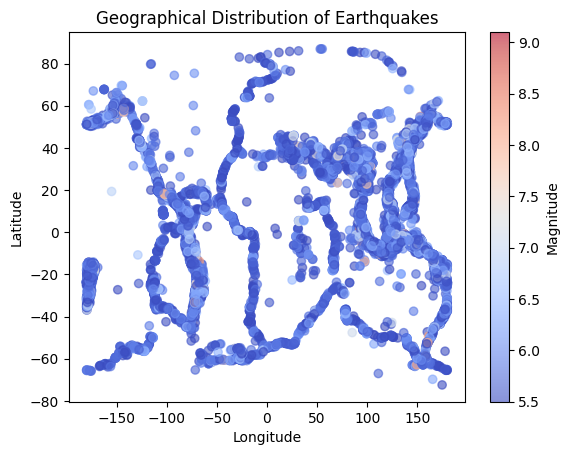

In [39]:
plt.scatter(df['longitude'], df['latitude'], alpha=0.6, c=df['mag'], cmap='coolwarm')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Magnitude')
plt.show()

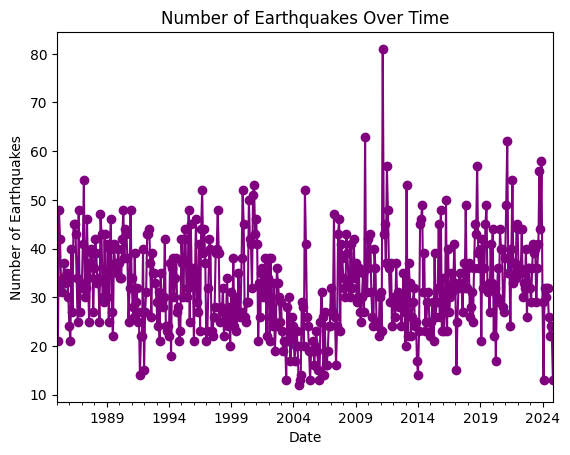

In [40]:
# Convert Date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot number of earthquakes over time
df.groupby(df['date'].dt.to_period('M')).size().plot(kind='line', marker='o', color='purple')
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()

In [41]:
def get_damage_description(magnitude):
    if 5.5 <= magnitude <= 6.0:
        return 'Slight damage to buildings and other structures.'
    elif 6.1 <= magnitude <= 6.9:
        return 'May cause a lot of damage in very populated areas.'
    elif 7.0 <= magnitude <= 7.9:
        return 'Major earthquake. Serious damage.'
    else:
        return 'Great earthquake. Can totally destroy communities near the epicenter.'


df['mag'] = pd.to_numeric(df['mag'], errors='coerce')

df['damage_description'] = df['mag'].apply(get_damage_description)

In [42]:
df.head()


,time_only,date,latitude,longitude,depth,mag,magType,year,damage_description
0,10:41:05,2024-11-15,-61.5218,153.9433,10.000,5.5,mww,2024,Slight damage to buildings and other structures.
1,05:28:29,2024-11-15,-4.7021,153.3201,51.891,6.6,mww,2024,May cause a lot of damage in very populated ar...
2,10:16:58,2024-11-11,20.2122,145.7557,41.918,5.6,mww,2024,Slight damage to buildings and other structures.
3,16:49:50,2024-11-10,19.8116,-77.0391,14.000,6.8,mww,2024,May cause a lot of damage in very populated ar...
4,15:50:02,2024-11-10,19.8523,-76.8901,14.219,5.9,mww,2024,Slight damage to buildings and other structures.


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['latitude'] = le.fit_transform(df['latitude'])
df['longitude'] = le.fit_transform(df['longitude'])
df['depth'] = le.fit_transform(df['depth'])
df['mag'] = le.fit_transform(df['mag'])
df['year'] = le.fit_transform(df['year'])
df['damage_description'] = le.fit_transform(df['damage_description'])

In [44]:
X = df.drop('damage_description', axis=1)
y = df['damage_description']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
print(X_train.dtypes)


time_only            object
date         datetime64[ns]
latitude              int64
longitude             int64
depth                 int64
mag                   int64
magType              object
year                  int64
dtype: object


In [46]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(":"))
    return h * 3600 + m * 60 + s

# Apply this transformation to the `time_only` column
X_train['time_only'] = X_train['time_only'].apply(time_to_seconds)
X_test['time_only'] = X_test['time_only'].apply(time_to_seconds)


In [47]:
# One-Hot Encode the `magType` column
X_train = pd.get_dummies(X_train, columns=['magType'])
X_test = pd.get_dummies(X_test, columns=['magType'])

# Ensure X_train and X_test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



In [48]:
print(X_train.dtypes)
print(X_test.dtypes)


time_only               int64
date           datetime64[ns]
latitude                int64
longitude               int64
depth                   int64
mag                     int64
year                    int64
magType_mw               bool
magType_mwc              bool
magType_mww              bool
dtype: object
time_only               int64
date           datetime64[ns]
latitude                int64
longitude               int64
depth                   int64
mag                     int64
year                    int64
magType_mw               bool
magType_mwc              bool
magType_mww              bool
dtype: object


In [49]:
# Extract year, month, day, and weekday from the 'date' column
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train['weekday'] = X_train['date'].dt.weekday

# Drop the original 'date' column
X_train = X_train.drop(columns=['date'])

# Apply the same transformation to the test set
X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test['weekday'] = X_test['date'].dt.weekday

# Drop the original 'date' column
X_test = X_test.drop(columns=['date'])


In [52]:
print(X_train.dtypes)
print(X_test.dtypes)


time_only      int64
latitude       int64
longitude      int64
depth          int64
mag            int64
year           int32
magType_mw      bool
magType_mwc     bool
magType_mww     bool
month          int32
day            int32
weekday        int32
dtype: object
time_only      int64
latitude       int64
longitude      int64
depth          int64
mag            int64
year           int32
magType_mw      bool
magType_mwc     bool
magType_mww     bool
month          int32
day            int32
weekday        int32
dtype: object


In [55]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)




Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.95      1.00      0.98        99
           2       1.00      1.00      1.00       648
           3       1.00      1.00      1.00      2338

    accuracy                           1.00      3095
   macro avg       0.99      0.85      0.89      3095
weighted avg       1.00      1.00      1.00      3095



In [56]:
rf_classifier.feature_importances_


array([1.02612783e-02, 1.04217016e-02, 1.21419803e-02, 1.64733856e-02,
       9.25239865e-01, 7.98965305e-03, 6.41562362e-04, 7.44568253e-04,
       1.15233835e-03, 4.57074158e-03, 6.55761440e-03, 3.80531117e-03])